# **Comprehensive EDA & Inferential Analysis**

## Using Cancer Patients Dataset from 2015-2024

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("global_cancer_patients_2015_2024.csv")

In [6]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [8]:
data.duplicated().sum()

np.int64(0)

## **Descriptive Analysis**

In [10]:
data["Age"]

0        71
1        34
2        80
3        40
4        43
         ..
49995    80
49996    40
49997    74
49998    21
49999    22
Name: Age, Length: 50000, dtype: int64

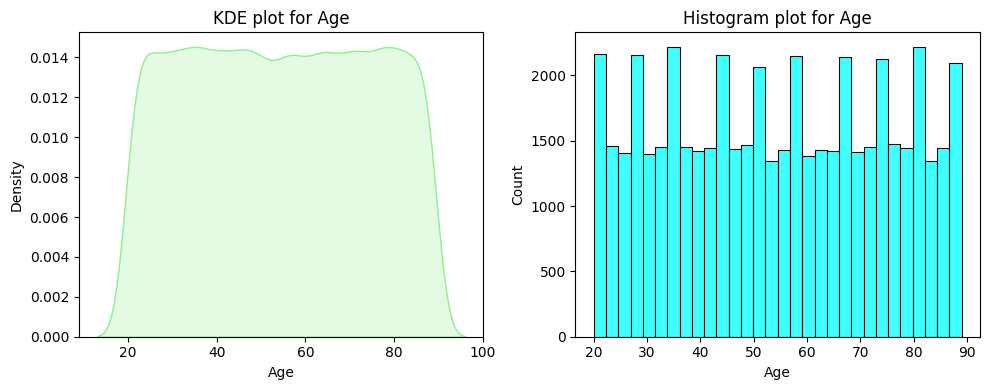

In [14]:
# Plotting for Age column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Age"],fill=True,color="lightgreen")
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Age"], bins=30, kde=False, color="cyan")
plt.title("Histogram plot for Age")

plt.tight_layout()
plt.show()

In [15]:
data["Age"].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

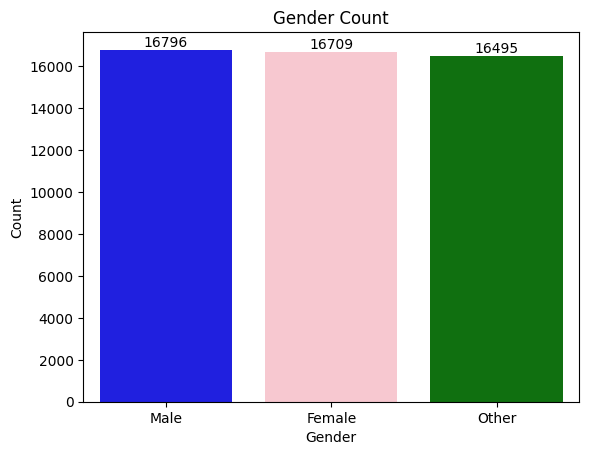

In [22]:
# Gender column
sns.barplot(x=data["Gender"].value_counts().index,
            y=data["Gender"].value_counts().values,
            palette=["blue","pink","green"]
            )

for i,v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")



plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [24]:
data["Gender"].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

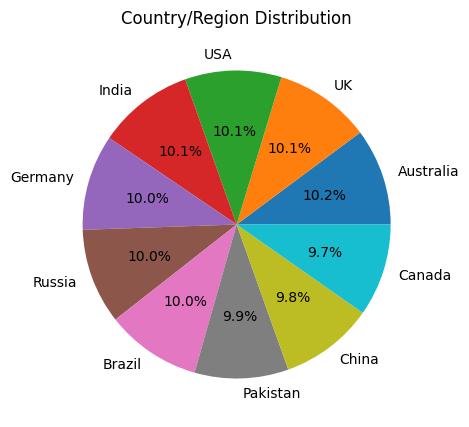

In [29]:
# Countries column

country_count=data["Country_Region"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(x=country_count.values,
        labels=country_count.index,
        autopct= '%1.1f%%'     
        )

plt.title("Country/Region Distribution")
plt.show()

In [35]:
country_count

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64


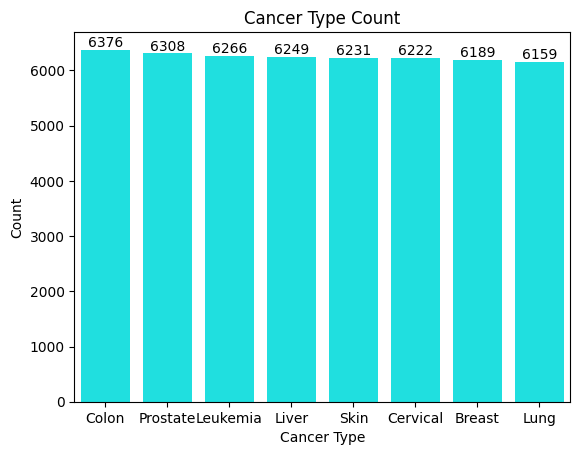

In [42]:
# Cancer_Type column
print(data["Cancer_Type"].value_counts())

sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values,
            color="cyan")

for i,v in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")



plt.title("Cancer Type Count")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()

Cancer_Stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64


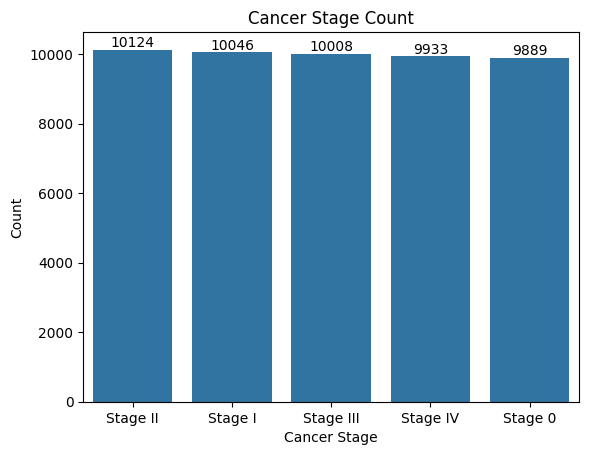

In [52]:
# Cancer Stage column

print(data["Cancer_Stage"].value_counts())
sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values,
            )

for i,v in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")



plt.title("Cancer Stage Count")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.show()

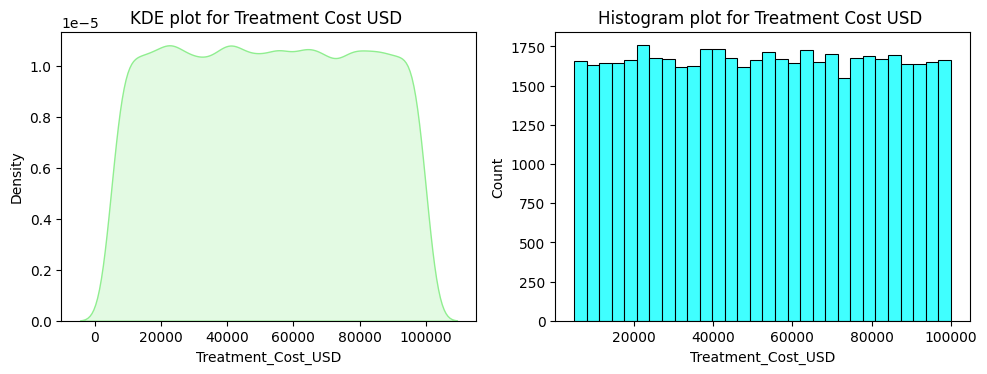

In [57]:
# Plotting for Treatment_Cost_USD column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"],fill=True,color="lightgreen")
plt.title("KDE plot for Treatment Cost USD ")

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], bins=30, kde=False, color="cyan")
plt.title("Histogram plot for Treatment Cost USD ")

plt.tight_layout()
plt.show()

In [58]:
data["Treatment_Cost_USD"].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

In [67]:
# Analysing the Risk Factors

columns_of_interest = ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

summary=data[columns_of_interest].agg(["mean", "std", "min", "max"])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


## **Inferential & Predictive Analysis**

### 1. Determine the relationship between risk factors and cancer severity

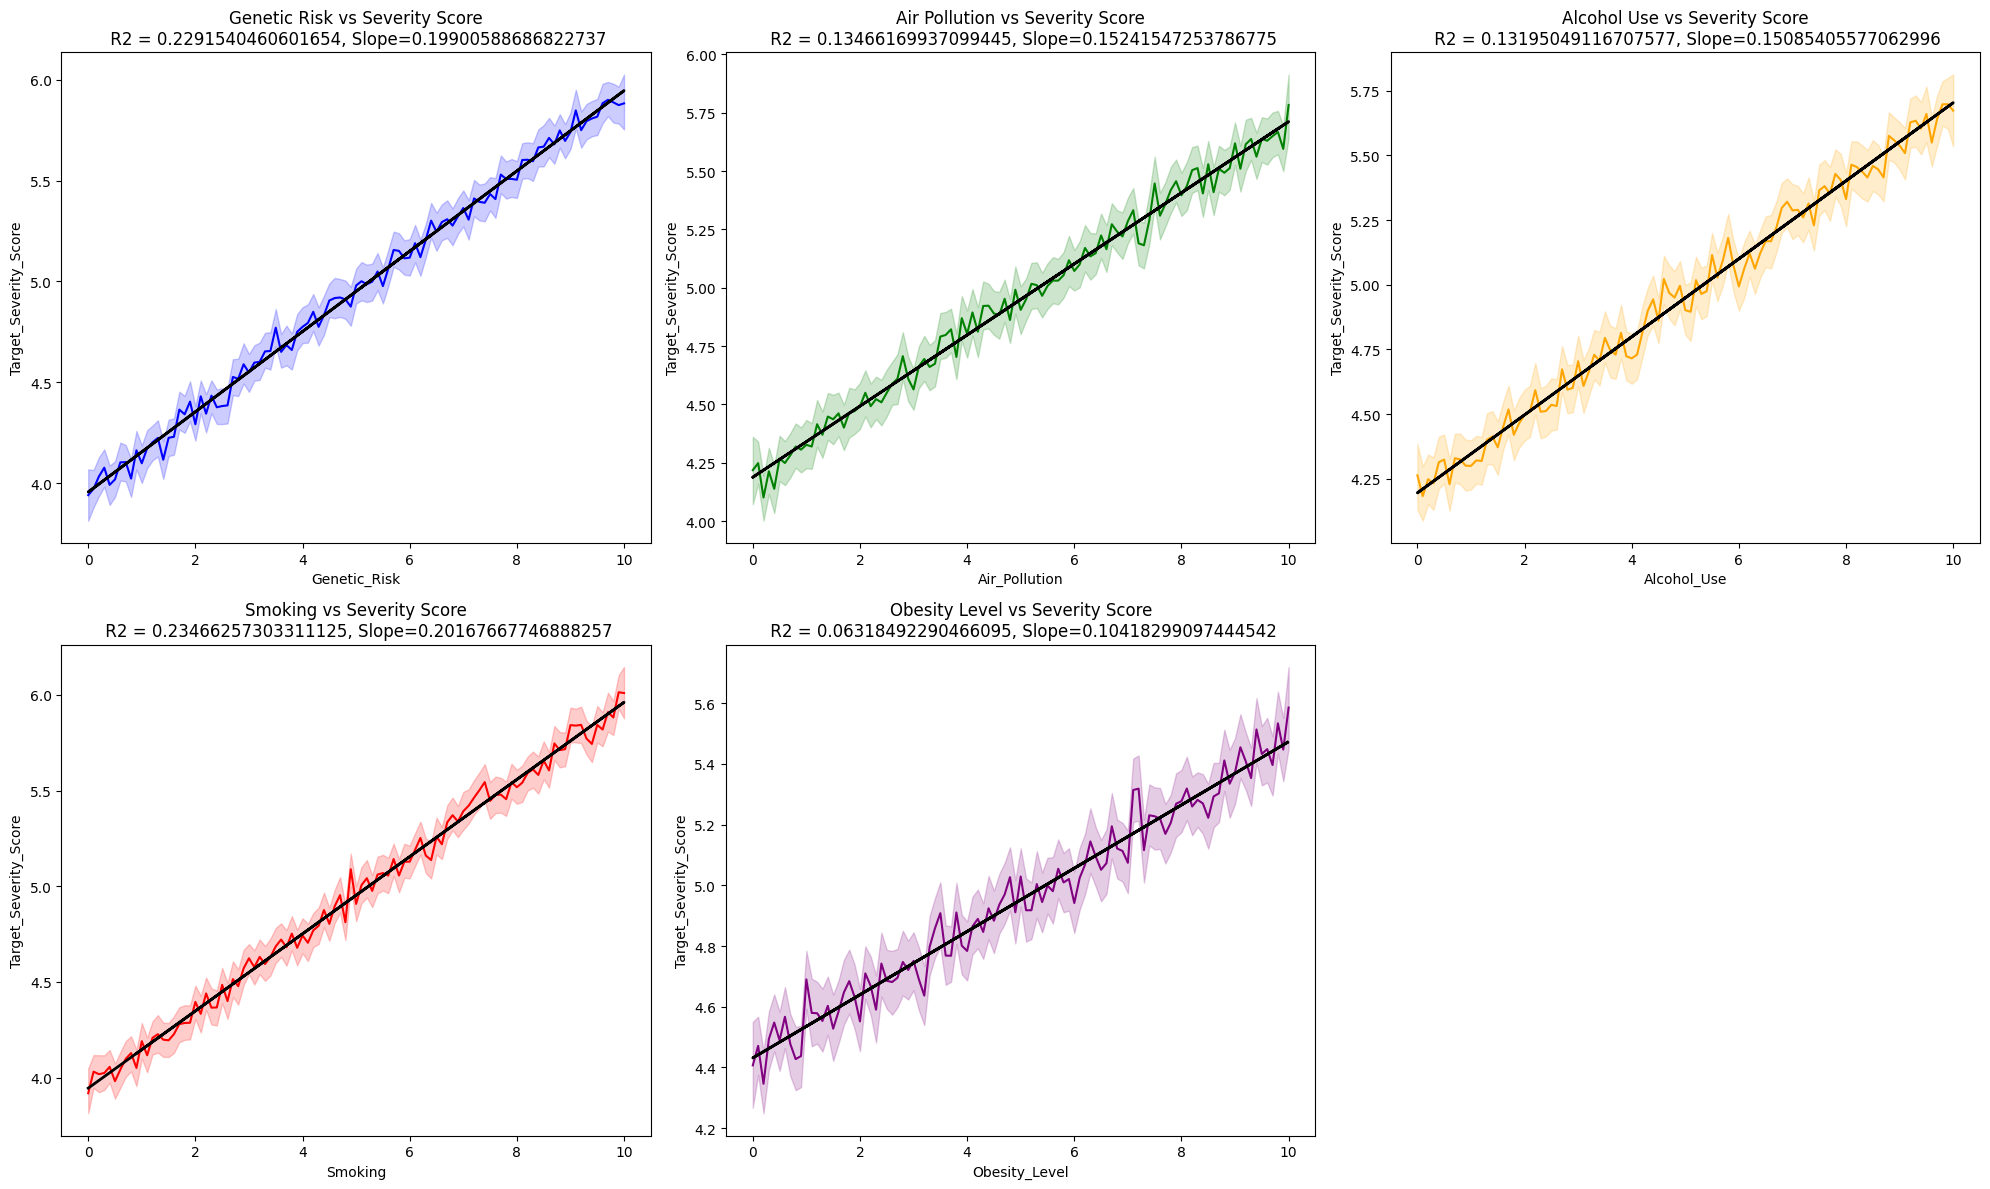

In [76]:
from scipy.stats import linregress

risk_factors = ['Genetic_Risk',	'Air_Pollution', 'Alcohol_Use',	'Smoking',	'Obesity_Level']
titles = ['Genetic Risk',	'Air Pollution', 'Alcohol Use',	'Smoking',	'Obesity Level']
colors = ["blue", "green", "orange", "red", "purple"]

plt.figure(figsize=(20,12))
for i , (factor, title, color) in enumerate(zip(risk_factors,titles,colors),1):
    plt.subplot(2,3,i)

    x=data[factor]
    y=data["Target_Severity_Score"]
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2

    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)
    plt.plot(x,x*slope+intercept, color="black", linewidth=2, label="Regression Line")
    plt.title(f"{title} vs Severity Score\n R2 = {r_squared}, Slope={slope}")
    plt.xlabel(factor)
    plt.ylabel("Target_Severity_Score")

# line:  y = mx + c

plt.tight_layout()
plt.show()

### 2. Analyze the proportion of early-stage diagnosis by cancer type

In [77]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [83]:
stage_counts = data[data["Cancer_Type"]=="Lung"]["Cancer_Stage"].value_counts()
early_stage_sum=stage_counts.get("Stage 0",0)+stage_counts.get("Stage I",0)
total_sum=stage_counts.sum()
proportion=(early_stage_sum/total_sum)*100
print(f"Proportion of Lung Cancer diagnosed at early stage (Stage 0 and I) : {proportion:.3f} %")

Proportion of Lung Cancer diagnosed at early stage (Stage 0 and I) : 38.432 %


In [85]:
stage_counts = data[data["Cancer_Type"]=="Leukemia"]["Cancer_Stage"].value_counts()
early_stage_sum=stage_counts.get("Stage 0",0)+stage_counts.get("Stage I",0)
total_sum=stage_counts.sum()
proportion=(early_stage_sum/total_sum)*100
print(f"Proportion of Leukemia Cancer diagnosed at early stage (Stage 0 and I) : {proportion:.3f} %")

Proportion of Leukemia Cancer diagnosed at early stage (Stage 0 and I) : 39.531 %


In [86]:
stage_counts = data[data["Cancer_Type"]=="Breast"]["Cancer_Stage"].value_counts()
early_stage_sum=stage_counts.get("Stage 0",0)+stage_counts.get("Stage I",0)
total_sum=stage_counts.sum()
proportion=(early_stage_sum/total_sum)*100
print(f"Proportion of Breast Cancer diagnosed at early stage (Stage 0 and I) : {proportion:.3f} %")

Proportion of Breast Cancer diagnosed at early stage (Stage 0 and I) : 39.473 %


In [87]:
stage_counts = data[data["Cancer_Type"]=="Colon"]["Cancer_Stage"].value_counts()
early_stage_sum=stage_counts.get("Stage 0",0)+stage_counts.get("Stage I",0)
total_sum=stage_counts.sum()
proportion=(early_stage_sum/total_sum)*100
print(f"Proportion of Colon Cancer diagnosed at early stage (Stage 0 and I) : {proportion:.3f} %")

Proportion of Colon Cancer diagnosed at early stage (Stage 0 and I) : 40.417 %


In [88]:
stage_counts = data[data["Cancer_Type"]=="Skin"]["Cancer_Stage"].value_counts()
early_stage_sum=stage_counts.get("Stage 0",0)+stage_counts.get("Stage I",0)
total_sum=stage_counts.sum()
proportion=(early_stage_sum/total_sum)*100
print(f"Proportion of Skin Cancer diagnosed at early stage (Stage 0 and I) : {proportion:.3f} %")

Proportion of Skin Cancer diagnosed at early stage (Stage 0 and I) : 40.411 %


In [89]:
stage_counts = data[data["Cancer_Type"]=="Cervical"]["Cancer_Stage"].value_counts()
early_stage_sum=stage_counts.get("Stage 0",0)+stage_counts.get("Stage I",0)
total_sum=stage_counts.sum()
proportion=(early_stage_sum/total_sum)*100
print(f"Proportion of Cervical Cancer diagnosed at early stage (Stage 0 and I) : {proportion:.3f} %")

Proportion of Cervical Cancer diagnosed at early stage (Stage 0 and I) : 39.859 %


In [90]:
stage_counts = data[data["Cancer_Type"]=="Prostate"]["Cancer_Stage"].value_counts()
early_stage_sum=stage_counts.get("Stage 0",0)+stage_counts.get("Stage I",0)
total_sum=stage_counts.sum()
proportion=(early_stage_sum/total_sum)*100
print(f"Proportion of Prostate Cancer diagnosed at early stage (Stage 0 and I) : {proportion:.3f} %")

Proportion of Prostate Cancer diagnosed at early stage (Stage 0 and I) : 40.187 %


In [91]:
stage_counts = data[data["Cancer_Type"]=="Liver"]["Cancer_Stage"].value_counts()
early_stage_sum=stage_counts.get("Stage 0",0)+stage_counts.get("Stage I",0)
total_sum=stage_counts.sum()
proportion=(early_stage_sum/total_sum)*100
print(f"Proportion of Liver Cancer diagnosed at early stage (Stage 0 and I) : {proportion:.3f} %")

Proportion of Liver Cancer diagnosed at early stage (Stage 0 and I) : 40.614 %


### 3. Identify key predictors of cancer severity and survival years

In [110]:
features = ['Age', 'Genetic_Risk',	'Air_Pollution', 'Alcohol_Use',	'Smoking',	'Obesity_Level']

targets = ['Survival_Years','Target_Severity_Score']

# Calculate Correlations
pearson_corr = data[features+targets].corr(method="pearson")
spearman_corr  = data[features+targets].corr(method="spearman")

# Slicing out only the relationship with target variables
pearson_results = pearson_corr[targets]
spearman_results = spearman_corr[targets]

# Combining Both
correlation_df=pd.concat([pearson_results,spearman_results], axis=1, keys=["Pearson","Spearman"])
correlation_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

In [136]:
# Random Forest for Target_Severity_Score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Converting Categorical Columns to Numerical Columns
categorical_columns = ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]

for col in categorical_columns:
    le =LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing for features and target

X = data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity = data["Target_Severity_Score"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_severity, test_size=0.2, random_state=40)

# Model training
model=RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=40)

# Model Fit
model.fit(X_train_s,y_train_s)

# Model Evaluation
train_r2_severity = r2_score(y_train_s, model.predict(X_train_s))
test_r2_severity = r2_score(y_test_s, model.predict(X_test_s))

In [137]:
print(train_r2_severity)
print(test_r2_severity)

0.9689592814707739
0.7752118592655884


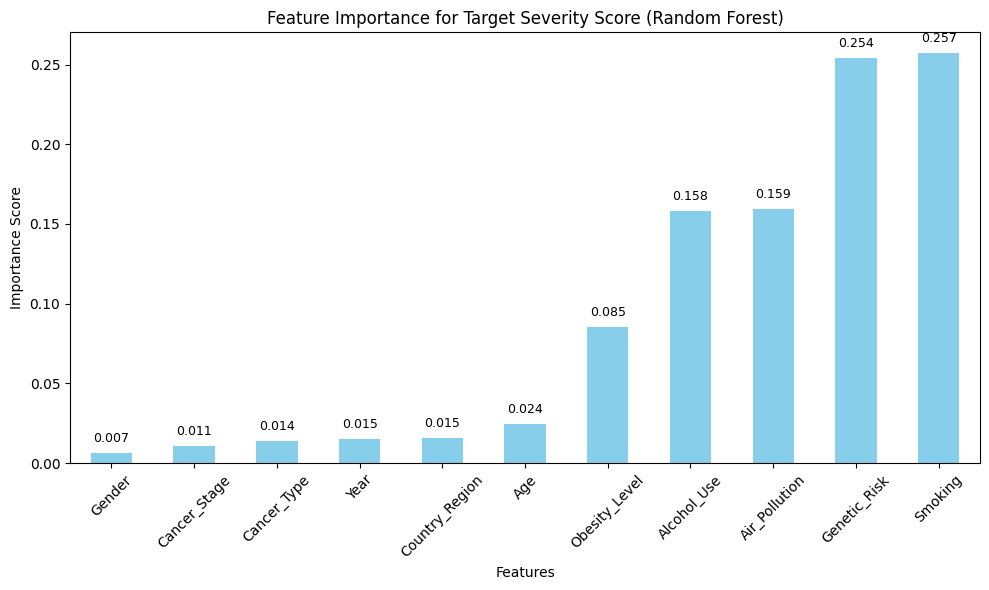

In [140]:
feature_imp_severity=pd.Series(model.feature_importances_, index=X.columns,).sort_values(ascending=True)

# Plotting of Important features
plt.figure(figsize=(10,6))
feature_imp_severity.plot(kind="bar", color="skyblue")
plt.title("Feature Importance for Target Severity Score (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation = 45)
plt.tight_layout()

for i, v in enumerate(feature_imp_severity):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', va='bottom', fontsize=9)

plt.show()

In [142]:
# Random Forest for Survival_Years
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Converting Categorical Columns to Numerical Columns
categorical_columns = ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]

for col in categorical_columns:
    le =LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing for features and target

X = data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_survival_yrs = data["Survival_Years"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_survival_yrs, test_size=0.2, random_state=40)


param_grid= {
    'n_estimators': [100,200],
    'max_depth': [5,10,None],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}


# Model training
model=RandomForestRegressor(random_state=40)
GSC=GridSearchCV(model,param_grid=param_grid, cv=3, scoring="r2", n_jobs=-1)


# Model Fit
GSC.fit(X_train_s,y_train_s)

best_rf_severity = GSC.best_estimator_

# Model Evaluation
train_r2_severity = r2_score(y_train_s, best_rf_severity.predict(X_train_s))
test_r2_severity = r2_score(y_test_s, best_rf_severity.predict(X_test_s))

In [143]:
print(train_r2_severity)
print(test_r2_severity)

0.008998065861791305
-0.0003487352301705382


<Axes: xlabel='Survival_Years', ylabel='Count'>

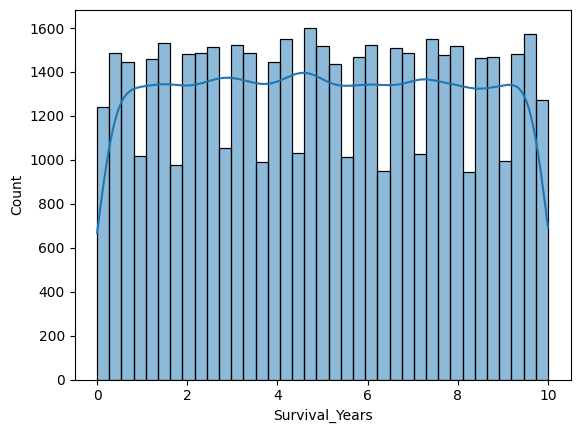

In [144]:
sns.histplot(data["Survival_Years"], kde=True)

In [145]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

Gender                  -0.007121
Cancer_Stage            -0.003014
Cancer_Type             -0.001717
Alcohol_Use             -0.000527
Treatment_Cost_USD      -0.000429
Age                     -0.000147
Year                     0.000018
Air_Pollution            0.000893
Smoking                  0.001371
Genetic_Risk             0.001708
Target_Severity_Score    0.004161
Country_Region           0.005121
Obesity_Level            0.009771
Survival_Years           1.000000
Name: Survival_Years, dtype: float64

"This information in our columns does not help the model to figure out how long someone will survive."

### 4. Explore the economic burden of cancer treantment across different demographics and countries

In [150]:
data=pd.read_csv("global_cancer_patients_2015_2024.csv")
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [156]:
data["Age_Group"]=pd.cut(data["Age"],bins=[0,30,45,60,75,100], labels=["0-30","31-45","46-60","61-75","76+"])
data.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76+
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45


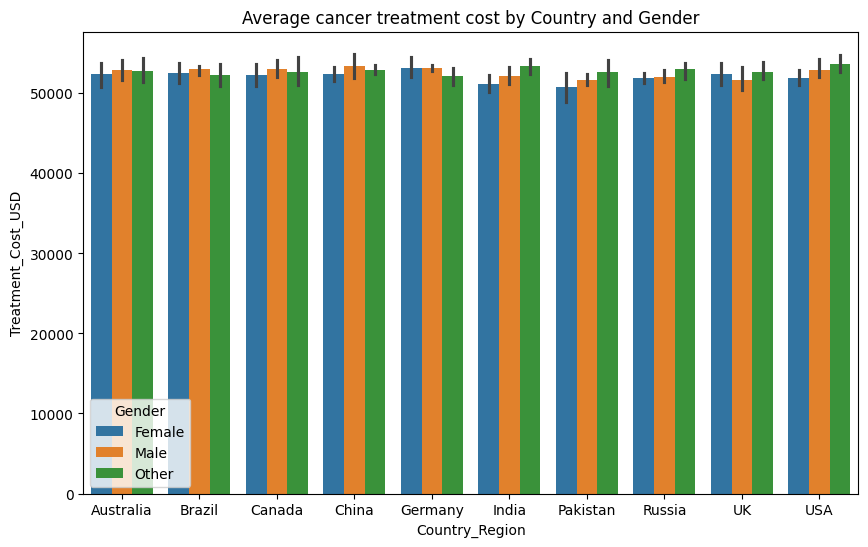

In [167]:
country_gender_cost=data.groupby(["Country_Region","Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=country_gender_cost,x="Country_Region", y="Treatment_Cost_USD", hue="Gender")
plt.title("Average cancer treatment cost by Country and Gender")
plt.show()

In [168]:
country_gender_cost=data.groupby(["Country_Region","Age_Group"])["Treatment_Cost_USD"].mean().reset_index()

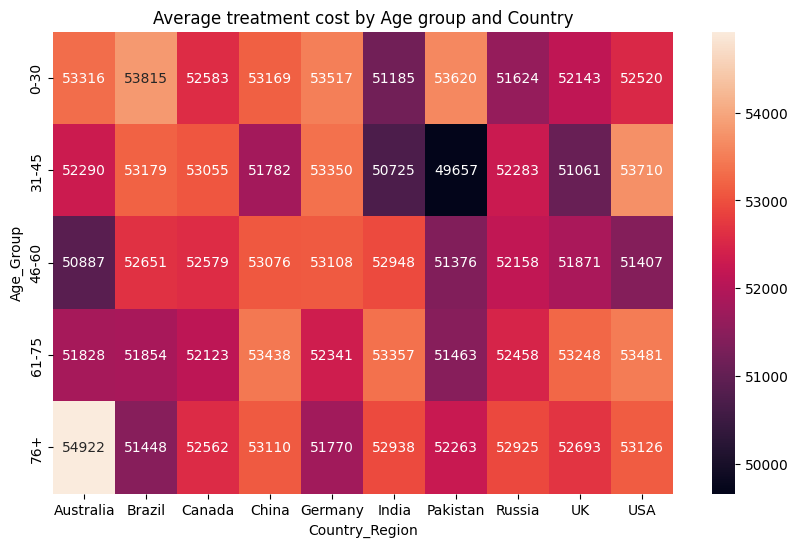

In [173]:
heatmap_data=country_gender_cost.pivot(index="Age_Group", columns="Country_Region", values="Treatment_Cost_USD")

# plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data,annot=True, fmt=".0f")
plt.title("Average treatment cost by Age group and Country")
plt.show()

### 5. Access whether higher treatment cost is associated with long term survival of the patient

- Null Hypothesis (H₀) :- There is no correlation between treatment cost and survival years.
- Alternative Hypothesis (H₁) :- There is a correlation (positive or negative) between treatment cost and survival years.

In [182]:
from scipy.stats import pearsonr, spearmanr

x = data["Treatment_Cost_USD"]
y = data["Survival_Years"]

# Pearson Correlation test
pearson_corr, pearson_p = pearsonr(x,y)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-value: {pearson_p}")


# Spearman Correlation test
spearman_corr, spearman_p = spearmanr(x,y)
print(f"\nSpearman Correlation Coefficient: {spearman_corr}")
print(f"Spearman P-value: {spearman_p}")


alpha = 0.05

def interpret_corr(corr, p, method):
    if p < alpha:
        print(f"\n\nIn {method} method, we reject thr hull hypothesis")
    else:
        print(f"\n In {method} method, we failed to reject null hypothesis")

interpret_corr(pearson_corr, pearson_p, "Pearson")
interpret_corr(spearman_corr, spearman_p, "Spearman")



Pearson Correlation Coefficient: -0.00042940542830214955
Pearson P-value: 0.9235082012963307

Spearman Correlation Coefficient: -0.0004454737292549569
Spearman P-value: 0.9206551702014918

 In Pearson method, we failed to reject null hypothesis

 In Spearman method, we failed to reject null hypothesis


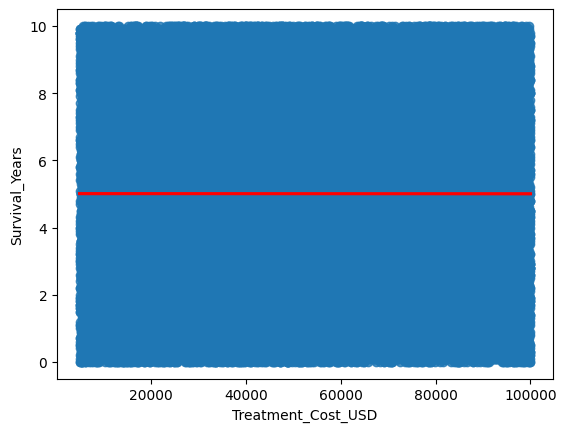

In [184]:
# plot for their relation
sns.regplot(x=x,y=y, line_kws={"color":"red"})
plt.show()

##### This concludes that there is no relation between Treatment cost and Survival years.

### 6. Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [185]:
df = data.copy()

In [188]:
cancer_stage_order = ["Stage 0", "Stage I", "Stage II", "Stage III", "Stage IV"]

In [193]:
grouped_stats=df.groupby("Cancer_Stage")[["Treatment_Cost_USD","Survival_Years"]].mean().reset_index()
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


In [196]:
grouped_cost=[]
grouped_survival=[]

for stage in cancer_stage_order:
    stage_data=df[df["Cancer_Stage"]==stage]
    cost = stage_data["Treatment_Cost_USD"]
    survival = stage_data["Survival_Years"]

    grouped_cost.append(cost)
    grouped_survival.append(survival)

len(grouped_cost)

5

In [202]:
# Check for normality using Shapiro Test
from scipy.stats import shapiro, f_oneway
normal_cost=0
normal_survival=0


for i in range (len(cancer_stage_order)):
    cost_p  = shapiro(grouped_cost[i]).pvalue
    surv_p = shapiro(grouped_survival[i]).pvalue
    print(f"cost {cost_p} for group {i}")
    print(f"surive {surv_p} for group {i}\n")
    if cost_p<0.05:
        normal_cost+=1
    if surv_p<0.05:
        normal_survival+=1

print(normal_cost)
print(normal_survival)

cost 1.5471821061637387e-47 for group 0
surive 1.6291039522109283e-47 for group 0

cost 7.306523956943449e-48 for group 1
surive 7.575551046262835e-48 for group 1

cost 8.943579643045432e-48 for group 2
surive 4.041659465829021e-48 for group 2

cost 5.267270033024548e-48 for group 3
surive 1.3648520457950436e-47 for group 3

cost 1.583864018957793e-47 for group 4
surive 2.299259828983219e-47 for group 4

5
5


In [206]:
from scipy.stats import kruskal

kruskal_cost=kruskal(*grouped_cost)
kruskal_survival=kruskal(*grouped_survival)

p_cost =  kruskal_cost.pvalue
p_survival =  kruskal_survival.pvalue

print(p_cost)
print(p_survival)

0.4254451689062656
0.6033078729984223


### 7. Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity

In [213]:
import statsmodels.formula.api as smf


model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking", data=data).fit()

model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

Coef.      -0.000228
Std.Err.    0.000471
t          -0.484187
P>|t|       0.628255
[0.025     -0.001150
0.975]      0.000694
Name: Genetic_Risk:Smoking, dtype: float64